<a href="https://colab.research.google.com/github/faniyonm/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Credit Card Fraud Detection

This project aims to build a machine learning model capable of identifying fraudulent credit card transactions from past records. By studying transaction behaviors and patterns, the model seeks to differentiate legitimate activities from fraudulent ones, enabling financial institutions to detect suspicious activity in advance and minimize potential financial losses.

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


##Load the Dataset
The dataset contains credit card transactions labeled as fraudulent or legitimate, with features describing transaction patterns. It is commonly used to develop and test fraud detection models.
We begin by loading the dataset into a pandas DataFrame and examining its structure. The dataset consists of 284,807 credit card transactions with 31 features, including:

Time: Seconds elapsed since the first transaction in the dataset.
V1–V28: Anonymized features derived using PCA to protect sensitive information.
Amount: The transaction amount.
Class: Target variable, where 0 indicates a normal transaction and 1 indicates fraud.

In [ ]:
#Load the Dataset
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


##Exploratory Data Analysis


We begin our exploratory analysis by looking at the class distribution of the dataset. The transactions are divided into two categories:

Valid transactions (Class = 0)

Fraudulent transactions (Class = 1)

We first count the number of fraud and valid cases, then visualize the imbalance using a bar plot. To better understand the scale of the problem, we calculate the fraud ratio, which shows the percentage of fraudulent transactions in the dataset. Finally, we take a closer look at the transaction amounts for fraud cases to see if they differ significantly from normal transactions.

In [ ]:
#Analyzing Class Distribution
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

Fraud Cases: 492
Valid Transactions: 284315


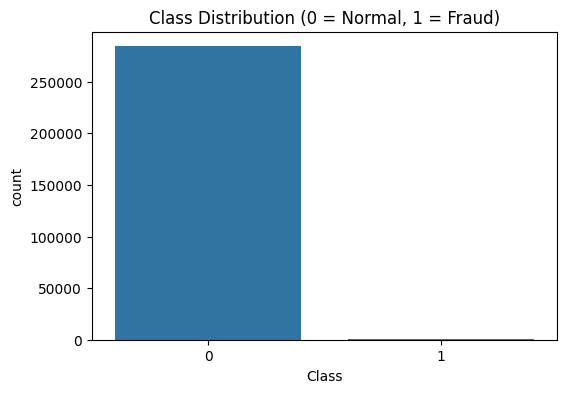

In [ ]:
# Class distribution visualisation
plt.figure(figsize=(6,4))
sns.countplot(x="Class", data=data)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()

In [ ]:
#Fraud Ratio
fraud_ratio = data['Class'].mean() * 100
print(f"Fraud cases: {fraud_ratio:.4f}% of all transactions")

Fraud cases: 0.1727% of all transactions


In [ ]:
#Amount details of the fraudulent transaction
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

Amount details of the fraudulent transaction


,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
#valid Transaction
print("details of valid transaction")
valid.Amount.describe()

details of valid transaction


,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


##Preparing the Data
In this step, we separate the input features (X) from the target variable (Y) and then split the dataset into training and testing sets.

X = data.drop(['Class'], axis=1) removes the target column so only the input features remain.

Y = data['Class'] selects the Class column as the target variable (fraud or not).

X.shape and Y.shape display the dimensions of the feature set and target variable.

xData = X.values and yData = Y.values convert them into NumPy arrays for efficient processing.

train_test_split(...) divides the dataset into 80% training and 20% testing data.

random_state=42 ensures reproducibility, meaning the split is the same every time the code runs.

In [ ]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(284807, 30)
(284807,)


##Building and Training the Model
In this project, the Random Forest classifier will be used as the model for fraud detection. Random Forest is chosen because it is robust, handles imbalanced datasets well, and can capture complex patterns in the data through its ensemble of decision trees.

In [ ]:
#Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)

##Evaluating the Model
After training the models, the next step is to evaluate their performance on the test dataset. Evaluation is done using metrics such as precision, recall, F1-score, ROC-AUC, and PR-AUC, which are particularly important for fraud detection due to the highly imbalanced nature of the data. These metrics help determine how well the model distinguishes fraudulent transactions from normal ones while minimizing false positives and false negatives.

Model Evaluation Metrics:
Accuracy: 0.9996
Precision: 0.9747
Recall: 0.7857
F1-Score: 0.8701
Matthews Correlation Coefficient: 0.8749


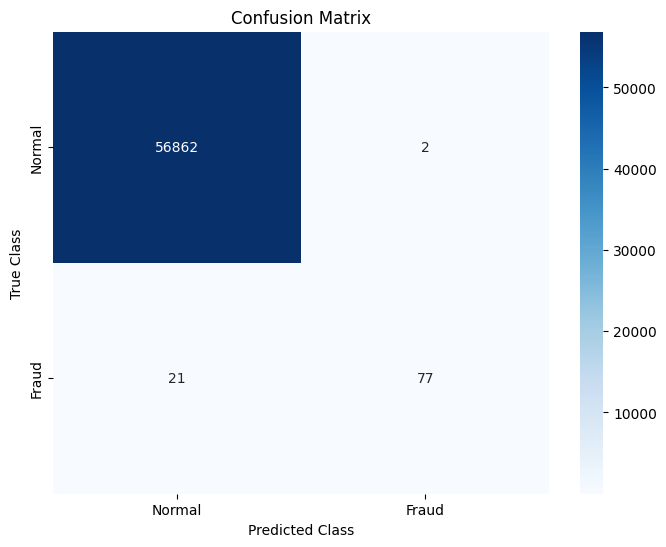

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

The model performed exceptionally well with an accuracy of 0.9996. It achieved high precision (0.9747), meaning most flagged cases were true frauds, and a recall of 0.7857, indicating strong fraud detection coverage. The balanced F1-score (0.8701) and a high MCC (0.8749) further confirm reliable performance despite class imbalance.

The confusion matrix shows that the model is highly accurate at identifying normal transactions, with only 2 mistakes out of more than 56,000. For fraudulent transactions, it correctly detected 77 cases but missed 21. This means the model is very reliable in avoiding false alarms, but a small number of fraud cases still go undetected.